### SVM - prime

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Get dataset from iris

In [11]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = iris['target']

# in Iris dataset, there are three target, here we just choose two of them
setosa_or_versicolor = (y==0) | (y==1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

fitting the model

In [12]:
svm_clf = SVC(kernel='linear', C=1000)
svm_clf.fit(X,y)

SVC(C=1000, kernel='linear')

decision boundary function

In [13]:
x0 = np.linspace(0, 5.5, 200)

def plot_svc_decision_boundary(svm_clf, xmin, xmax, sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 100)
    decision_boundary = - w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0], svs[:,1],s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-')
    plt.plot(x0, gutter_up, 'k--')
    plt.plot(x0, gutter_down, 'k--')

comparing random line and SVM decision line

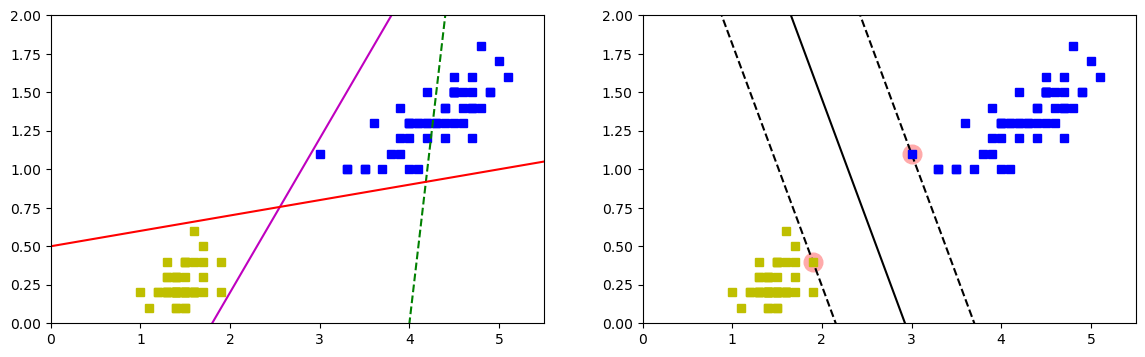

In [14]:
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5
plt.figure(figsize=(14,4))
# random lines
plt.subplot(121)
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'ys')
plt.plot(x0, pred_1, 'g--')
plt.plot(x0, pred_2, 'm-')
plt.plot(x0, pred_3, 'r-')
plt.axis([0,5.5,0,2])

# SVM decision line
plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'ys')
plt.axis([0,5.5,0,2])
plt.show()

### Soft-margin SVM

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target']==2).astype(np.float64)

Training model

Comparing impact from different C

In [17]:
scaler = StandardScaler(with_mean=True)
svm_clf_1 = LinearSVC(C=1, random_state=42)
svm_clf_2 = LinearSVC(C=1000, random_state=42)

scaled_svm_clf_1 = Pipeline((
    ('std', scaler),
    ('linear_svc', svm_clf_1)
))

scaled_svm_clf_2 = Pipeline((
    ('std', scaler),
    ('linear_svc', svm_clf_2)
))

scaled_svm_clf_1.fit(X,y)
scaled_svm_clf_2.fit(X,y)

/Users/leeveschou/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('std', StandardScaler()),
                ('linear_svc', LinearSVC(C=1000, random_state=42))])

we should convert those parameters back, because the standardized operation during fitting

In [18]:
b1 = svm_clf_1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf_2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf_1.coef_[0] / scaler.scale_
w2 = svm_clf_2.coef_[0] / scaler.scale_
svm_clf_1.intercept_ = np.array([b1])
svm_clf_2.intercept_ = np.array([b2])
svm_clf_1.coef_ = np.array([w1])
svm_clf_2.coef_ = np.array([w2])

plot for different c

(4.0, 6.0, 0.8, 2.8)

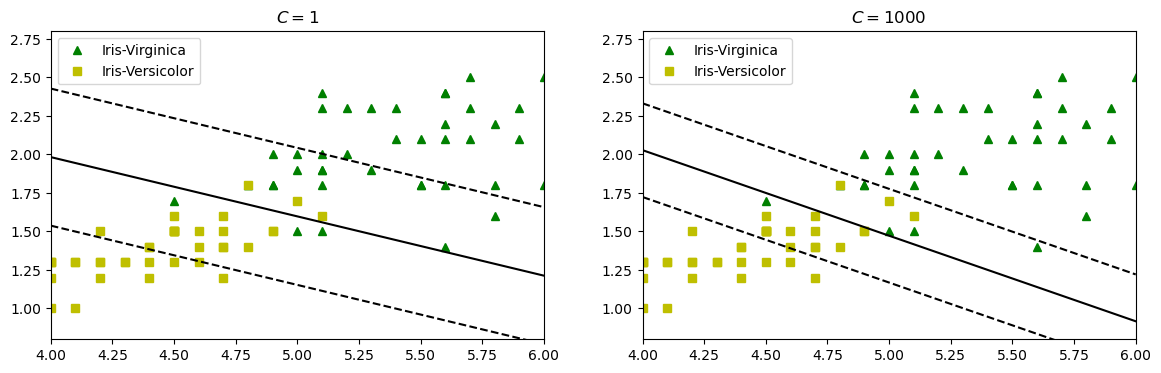

In [22]:
plt.figure(figsize=(14,4))
# random lines
plt.subplot(121)
plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^', label='Iris-Virginica')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'ys', label='Iris-Versicolor')
plot_svc_decision_boundary(svm_clf_1, 4, 6, sv=False)
plt.legend()
plt.title('$C={}$'.format(svm_clf_1.C))
plt.axis([4,6.0,0.8,2.8])

plt.subplot(122)
plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^', label='Iris-Virginica')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'ys', label='Iris-Versicolor')
plot_svc_decision_boundary(svm_clf_2, 4, 6, sv=False)
plt.legend()
plt.title('$C={}$'.format(svm_clf_2.C))
plt.axis([4,6.0,0.8,2.8])

with higher C the SVM classifier has higher accuracy and higher risk of over fitting.

### non-linear SVM

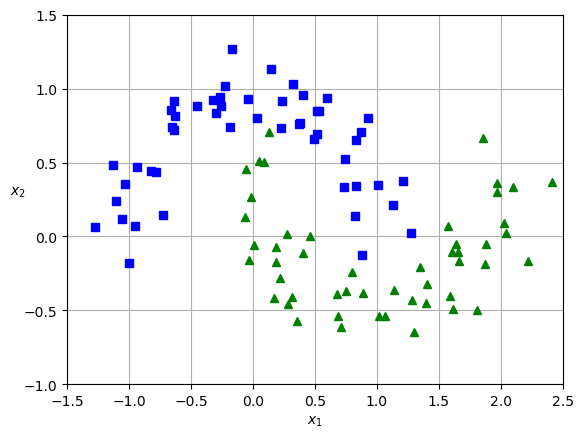

In [23]:
# create a complex dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'bs')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$', rotation=0)
    
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

fit model with polynomial not **Kernal**

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
))

polynomial_svm_clf.fit(X,y)

/Users/leeveschou/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

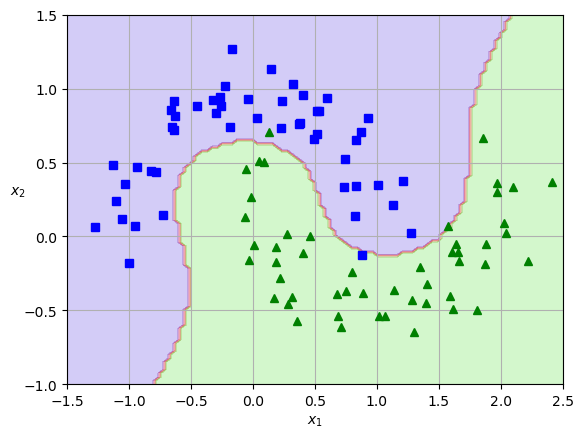

In [27]:
def plot_predictons(clf, axis):
    x0s = np.linspace(axis[0], axis[1], 100)
    x1s = np.linspace(axis[2], axis[3], 100)
    x0,x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred, cmap=plt.cm.brg, alpha=0.2)
    
plot_predictons(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X,y,[-1.5, 2.5, -1, 1.5])

fit model with **Kernel**

In [28]:
rbf_kernel_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
))
rbf_kernel_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

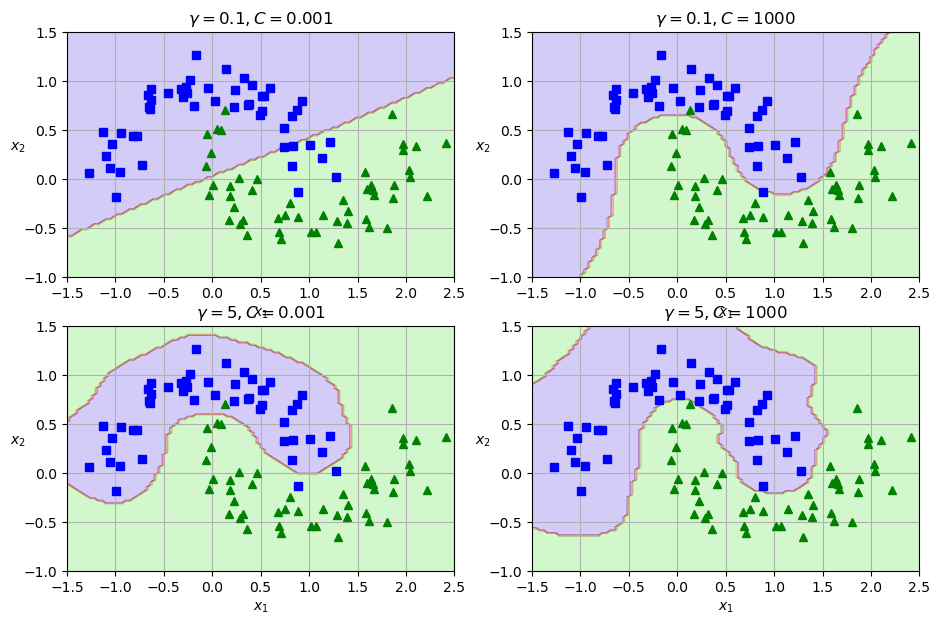

In [30]:
from sklearn.svm import SVC

gammal1, gammal2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gammal1, C1), (gammal1, C2), (gammal2, C1), (gammal2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline((
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=gamma, C=C))
    ))
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
plt.figure(figsize=(11,7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221+i)
    plot_predictons(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r'$\gamma={}, C={}$'.format(gamma,C))
plt.show()